In [1]:
import sys
import numpy
import pandas
import matplotlib
import sklearn

In [2]:
print(f'Python: {sys.version}')
print(f'Numpy: {numpy.__version__}')
print(f"Pandas: {pandas.__version__}")
print(f"matplotlib: {matplotlib.__version__}")
print(f'sklearn: {sklearn.__version__}')

Python: 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
Numpy: 1.14.3
Pandas: 0.23.0
matplotlib: 2.2.2
sklearn: 0.19.1


In [3]:
import numpy as np

In [9]:
from sklearn import preprocessing, cross_validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score

In [10]:
from pandas.plotting import scatter_matrix

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
# Loading a dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"

In [14]:
# Columns for the dataset
names = ['id', 'clump_thickness', 'uniform_cell_size',
        'uniform_cell_shape', 'margnial_adhesion', 
        'single_epithelial_size','bare_nuclei',
        'bland_chromatin', 'normal_nucleoli',
        'mitoses', 'class']

In [15]:
# Loading the dataset using pandas
df = pd.read_csv(url, names=names)

In [16]:
# Handling the null values
df.replace('?', -9999, inplace=True)
print(df.axes)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'margnial_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]


In [17]:
# Print the shape of the dataset
print(df.shape)

(699, 11)


In [18]:
dummy = df.drop(['id'], 1)

In [19]:
dummy.shape

(699, 10)

In [20]:
back_up = df

In [22]:
df.drop(['id'], axis=1, inplace=True)

In [23]:
df.shape

(699, 10)

In [24]:
df.loc[0]

clump_thickness           5
uniform_cell_size         1
uniform_cell_shape        1
margnial_adhesion         1
single_epithelial_size    2
bare_nuclei               1
bland_chromatin           3
normal_nucleoli           1
mitoses                   1
class                     2
Name: 0, dtype: object

In [25]:
df.iloc[0]

clump_thickness           5
uniform_cell_size         1
uniform_cell_shape        1
margnial_adhesion         1
single_epithelial_size    2
bare_nuclei               1
bland_chromatin           3
normal_nucleoli           1
mitoses                   1
class                     2
Name: 0, dtype: object

In [26]:
print(df.describe)

<bound method NDFrame.describe of      clump_thickness  uniform_cell_size  uniform_cell_shape  \
0                  5                  1                   1   
1                  5                  4                   4   
2                  3                  1                   1   
3                  6                  8                   8   
4                  4                  1                   1   
5                  8                 10                  10   
6                  1                  1                   1   
7                  2                  1                   2   
8                  2                  1                   1   
9                  4                  2                   1   
10                 1                  1                   1   
11                 2                  1                   1   
12                 5                  3                   3   
13                 1                  1                   1   
14                 8 

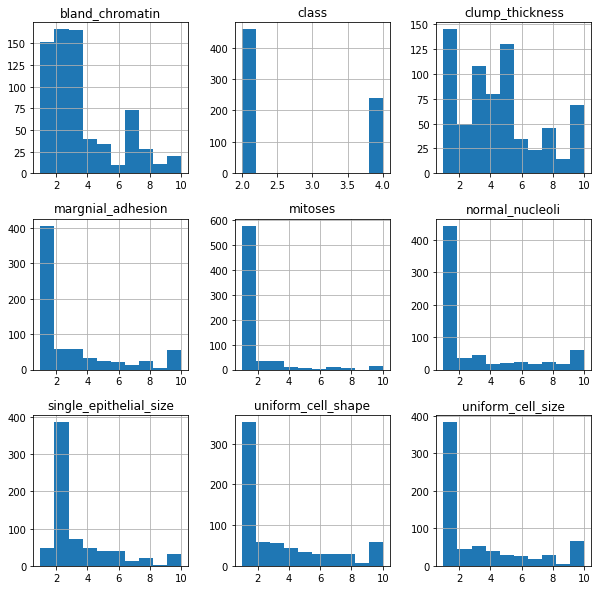

In [31]:
# Plot histograms for each variable
df.hist(figsize=(10,10))
plt.show()

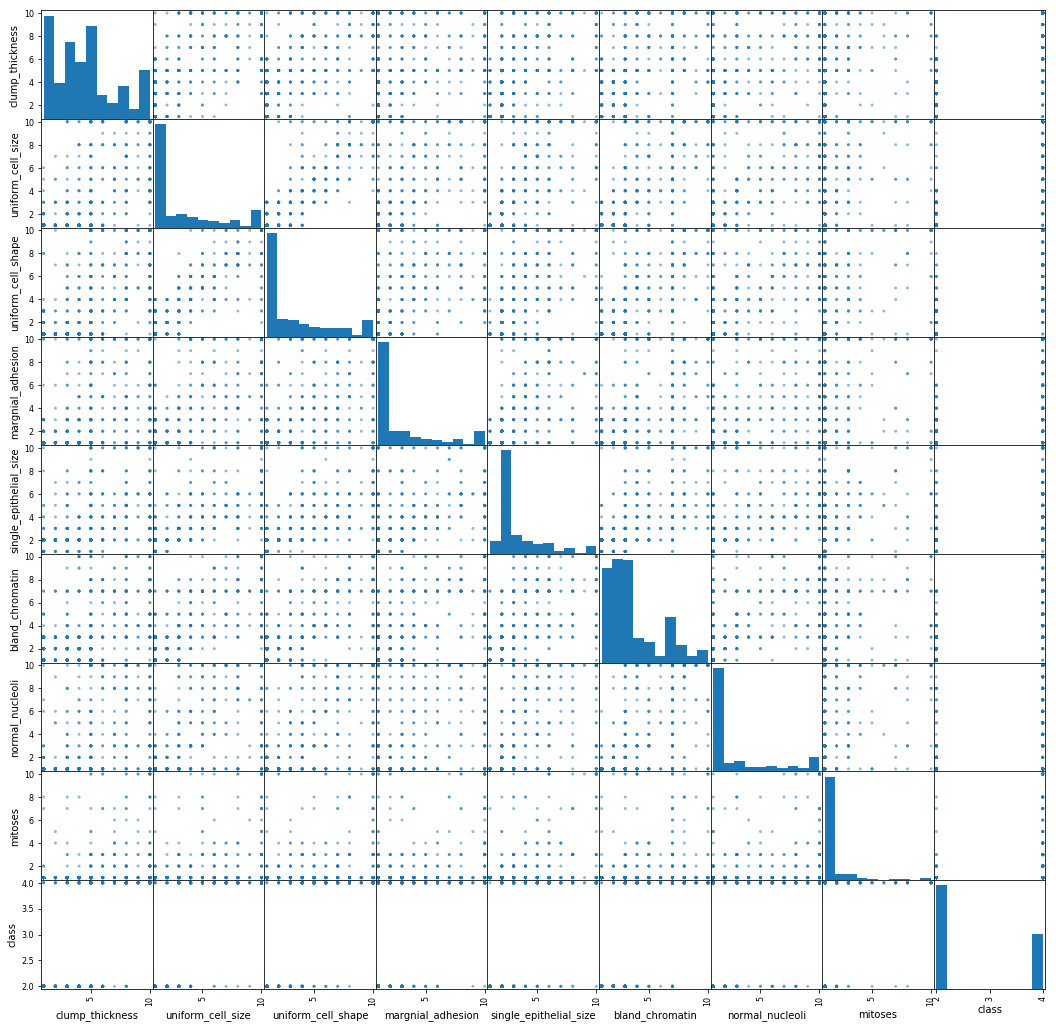

In [33]:
# Create Scatter Plot matrix
# Helps in analysing the relationship b/w the features.
scatter_matrix(frame = df, figsize=(18,18))
plt.show()

In [40]:
# Create X and Y datasets for training
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

In [42]:
# Create the train and test splits
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2                                                                   )

In [43]:
# Specify testing options
seed = 0
scoring = 'accuracy'

In [45]:
# Define the models for train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM', SVC()))

In [49]:
# Evaluate each model in turn now
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results) # The cv results obatained
    names.append(name) # The name of the model used in step
    msg = f'Name:{name} Mean:{cv_results.mean()} Std:{cv_results.std()}'
    print(msg)

Name:KNN Mean:0.9767532467532469 Std:0.017936776393134245
Name:SVM Mean:0.9642207792207792 Std:0.013833455088161013


In [55]:
# Make predictions on the evaluation dataset

for name, model in models:
    model.fit(X_train, y_train) # Train the model on train dataset
    predictions = model.predict(X_test) # Predict on the test dataset
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))

KNN
0.95
             precision    recall  f1-score   support

          2       0.98      0.95      0.96        98
          4       0.89      0.95      0.92        42

avg / total       0.95      0.95      0.95       140

SVM
0.9428571428571428
             precision    recall  f1-score   support

          2       1.00      0.92      0.96        98
          4       0.84      1.00      0.91        42

avg / total       0.95      0.94      0.94       140



In [56]:
# Precision: High precision, less false positives
# Recall: High recall, less false negatives
# f1-score: Good f1 score, less false positives and less false negatives

In [57]:
# A Short demo
clf = SVC()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test) # Calls the predict method and takes the mean
print(accuracy)

0.9428571428571428


In [66]:
example = np.array([[4,2,1,1,1,2,3,2,5]])
example = example.reshape(len(example), -1)
print(example.shape)
# Here each datapoint should be a row
prediction = clf.predict(example)
print(prediction)

(1, 9)
[4]
